# Clustering using cami datasets

## Cami Toy low complexity dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import dash_bio
import sys
sys.setrecursionlimit(100000)
import seaborn as sns
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/_config/config.py:620: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [2]:
#https://www.metagenomics.wiki/tools/blast/blastn-output-format-6
df_blast=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/30_genomes.gtdb.blastp.tsv", sep="\t", header=None, usecols=[0, 1, 2, 10, 11])
df_blast=df_blast.rename(columns={0:"qseqid", 1: "sseqid", 2:"pident", 10:"e-value", 11:"bitscore"})
df_blast

,qseqid,sseqid,pident,e-value,bitscore
0,S|S1|C15_1,GCA_902381685.1,100.0,1.460000e-41,153.0
1,S|S1|C15_1,GCA_900549995.1,78.9,1.200000e-32,128.0
2,S|S1|C15_1,GCA_900550235.1,78.9,1.070000e-31,125.0
3,S|S1|C15_1,GCA_905197485.1,80.3,2.730000e-31,124.0
4,S|S1|C15_1,GCF_016900655.1,76.0,3.750000e-31,124.0
...,...,...,...,...,...
11747314,S|S1|C55794_6,GCF_900107195.1,46.2,2.570000e-61,203.0
11747315,S|S1|C55794_6,GCF_007004735.1,44.1,2.990000e-61,203.0
11747316,S|S1|C55794_6,GCF_000337835.1,43.7,3.280000e-61,203.0
11747317,S|S1|C55794_6,GCF_009674605.1,45.6,3.900000e-61,202.0


In [3]:
mapTaxid_df=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/gtdb-taxdump/R207/taxid.map", sep="\t",header=None)
mapTaxid_df=mapTaxid_df.rename(columns={0:"sseqid", 1: "taxid"})
mapTaxid_df


,sseqid,taxid
0,GCF_000979375.1,1349515035
1,GCF_000970165.1,1457399847
2,GCF_000979555.1,732503645
3,GCF_000980105.1,2988443261
4,GCF_000007065.1,369781300
...,...,...
317537,GCA_003222815.1,1987068165
317538,GCA_910586715.1,3806983282
317539,GCA_910583785.1,2506431460
317540,GCA_017556805.1,3295183182


In [4]:
blast_taxid_df=df_blast.merge(mapTaxid_df, on="sseqid", how="inner")
blast_taxid_df

,qseqid,sseqid,pident,e-value,bitscore,taxid
0,S|S1|C15_1,GCA_902381685.1,100.0,1.460000e-41,153.0,1736166701
1,S|S1|C15_2,GCA_902381685.1,100.0,8.490000e-36,125.0,1736166701
2,S|S1|C15_3,GCA_902381685.1,100.0,1.410000e-126,363.0,1736166701
3,S|S1|C15_4,GCA_902381685.1,100.0,0.000000e+00,898.0,1736166701
4,S|S1|C15_5,GCA_902381685.1,100.0,0.000000e+00,919.0,1736166701
...,...,...,...,...,...,...
11747314,S|S1|C51755_318,GCA_002254415.1,38.0,9.270000e-53,183.0,768257595
11747315,S|S1|C51755_265,GCA_000010645.1,45.6,1.100000e-75,240.0,38421175
11747316,S|S1|C51755_318,GCA_002789465.1,38.4,1.210000e-56,193.0,3979176545
11747317,S|S1|C51755_352,GCA_002687275.1,27.2,2.290000e-29,124.0,4108335183


In [5]:
orf_lca_df=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/30_genomes.gtdb.orfs.lca.tsv", sep="\t")
orf_lca_df

,qseqid,name,rank,lca
0,S|S1|C15_1,902381685,no rank,1736166701
1,S|S1|C15_2,902381685,no rank,1736166701
2,S|S1|C15_3,902381685,no rank,1736166701
3,S|S1|C15_4,902381685,no rank,1736166701
4,S|S1|C15_5,902381685,no rank,1736166701
...,...,...,...,...
68388,S|S1|C55794_2,000496235,no rank,272826040
68389,S|S1|C55794_3,000496235,no rank,272826040
68390,S|S1|C55794_4,000496235,no rank,272826040
68391,S|S1|C55794_5,000496235,no rank,272826040


In [6]:
blast_lca_df=blast_taxid_df.merge(orf_lca_df, on="qseqid", how="outer")
blast_lca_df

,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca
0,S|S1|C15_1,GCA_902381685.1,100.0,1.460000e-41,153.0,1736166701,902381685,no rank,1736166701
1,S|S1|C15_1,GCA_900549995.1,78.9,1.200000e-32,128.0,68063635,902381685,no rank,1736166701
2,S|S1|C15_1,GCA_900550235.1,78.9,1.070000e-31,125.0,4205286776,902381685,no rank,1736166701
3,S|S1|C15_1,GCA_905197485.1,80.3,2.730000e-31,124.0,357385291,902381685,no rank,1736166701
4,S|S1|C15_1,GCF_016900655.1,76.0,3.750000e-31,124.0,3690373915,902381685,no rank,1736166701
...,...,...,...,...,...,...,...,...,...
11747314,S|S1|C53670_2,GCA_000496235.1,100.0,1.380000e-48,156.0,272826040,000496235,no rank,272826040
11747315,S|S1|C53670_3,GCA_000496235.1,100.0,3.100000e-65,200.0,272826040,000496235,no rank,272826040
11747316,S|S1|C53670_4,GCA_000496235.1,100.0,1.340000e-30,116.0,272826040,000496235,no rank,272826040
11747317,S|S1|C54222_8,GCA_000496235.1,100.0,3.810000e-42,140.0,272826040,000496235,no rank,272826040


In [12]:
blast_lca_df.loc[blast_lca_df['qseqid'] == "S|S1|C15_1"]

,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca
0,S|S1|C15_1,GCA_902381685.1,100.0,1.460000e-41,153.0,1736166701,902381685,no rank,1736166701
1,S|S1|C15_1,GCA_900549995.1,78.9,1.200000e-32,128.0,68063635,902381685,no rank,1736166701
2,S|S1|C15_1,GCA_900550235.1,78.9,1.070000e-31,125.0,4205286776,902381685,no rank,1736166701
3,S|S1|C15_1,GCA_905197485.1,80.3,2.730000e-31,124.0,357385291,902381685,no rank,1736166701
4,S|S1|C15_1,GCF_016900655.1,76.0,3.750000e-31,124.0,3690373915,902381685,no rank,1736166701
...,...,...,...,...,...,...,...,...,...
195,S|S1|C15_1,GCA_902782655.1,66.7,2.970000e-17,77.8,1718855967,902381685,no rank,1736166701
196,S|S1|C15_1,GCF_009677585.1,57.9,3.220000e-17,84.3,689745874,902381685,no rank,1736166701
197,S|S1|C15_1,GCA_019114545.1,59.2,3.220000e-17,84.3,852534859,902381685,no rank,1736166701
198,S|S1|C15_1,GCF_900129135.1,57.9,3.220000e-17,84.3,3307957261,902381685,no rank,1736166701


In [6]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
blast_lca_df.sort_values(by=["qseqid", "bitscore"], ascending=[True, False], inplace=True)
#https://stackoverflow.com/questions/16424493/pandas-setting-no-of-max-rows
with pd.option_context('display.min_rows', 50):
    display(blast_lca_df[blast_lca_df.duplicated(subset=['qseqid','sseqid'], keep=False)])

,qseqid,sseqid,pident,e-value,bitscore,name,rank,lca
2854009,S|S1|C10001_1,GCF_000012365.1,98.3,1.250000e-33,125.0,burkholderia,genus,835133672
2854010,S|S1|C10001_1,GCF_000959365.1,70.0,4.510000e-17,82.0,burkholderia,genus,835133672
2854011,S|S1|C10001_1,GCF_000959365.1,68.3,7.160000e-09,59.7,burkholderia,genus,835133672
2854012,S|S1|C10001_1,GCF_000012365.1,69.0,5.380000e-06,51.6,burkholderia,genus,835133672
2854013,S|S1|C10001_2,GCF_000011705.1,100.0,6.660000e-267,731.0,000011705,no rank,1132927932
2854014,S|S1|C10001_2,GCF_000959365.1,83.8,5.780000e-227,630.0,000011705,no rank,1132927932
2854015,S|S1|C10001_2,GCF_001462435.1,79.3,7.240000e-209,584.0,000011705,no rank,1132927932
2854016,S|S1|C10001_2,GCF_000959365.1,73.1,3.570000e-198,557.0,000011705,no rank,1132927932
2854017,S|S1|C10001_2,GCF_001462435.1,71.6,8.140000e-190,536.0,000011705,no rank,1132927932
2854018,S|S1|C10001_2,GCF_000011705.1,68.2,1.950000e-180,512.0,000011705,no rank,1132927932


Below I'm first sorting the above table by query ID and bitscore. Then removing the queries which share the same sseqID, except for the one with the heighest bitscore.

In [13]:
#https://stackoverflow.com/a/53177509/12671809
#https://stackoverflow.com/a/68654878/12671809
blast_lca_df.sort_values(by=["qseqid", "bitscore"], ascending=[True, False], inplace=True)
blast_lca_df2=blast_lca_df.drop_duplicates(subset=['sseqid', 'qseqid'])
blast_lca_df2

,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca
4242071,S|S1|C10001_1,GCF_000011705.1,100.0,3.180000e-34,127.0,1132927932,burkholderia,genus,835133672
4242067,S|S1|C10001_1,GCF_000012365.1,98.3,1.250000e-33,125.0,1730790438,burkholderia,genus,835133672
4242069,S|S1|C10001_1,GCF_000959365.1,70.0,4.510000e-17,82.0,672627656,burkholderia,genus,835133672
4187629,S|S1|C10001_2,GCF_000011705.1,100.0,6.660000e-267,731.0,1132927932,000011705,no rank,1132927932
4187627,S|S1|C10001_2,GCF_000959365.1,83.8,5.780000e-227,630.0,672627656,000011705,no rank,1132927932
...,...,...,...,...,...,...,...,...,...
152769,S|S1|C9986_9,GCA_017399445.1,46.5,1.650000e-104,324.0,1323388952,902381685,no rank,1736166701
152848,S|S1|C9986_9,GCA_910589265.1,47.0,2.200000e-104,324.0,3481688409,902381685,no rank,1736166701
152813,S|S1|C9986_9,GCF_003478085.1,45.9,4.540000e-104,323.0,2979942861,902381685,no rank,1736166701
152814,S|S1|C9986_9,GCA_900548905.1,45.9,4.540000e-104,323.0,3828553300,902381685,no rank,1736166701


Insteading removing rows with the same qseqid and sseqid, here I'm removing the ones with the same qseqid and taxid.

In [7]:
blast_lca_df.sort_values(by=["qseqid", "bitscore"], ascending=[True, False], inplace=True)
blast_lca_df3=blast_lca_df.drop_duplicates(subset=['taxid', 'qseqid'])
blast_lca_df3

,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca
4242071,S|S1|C10001_1,GCF_000011705.1,100.0,3.180000e-34,127.0,1132927932,burkholderia,genus,835133672
4242067,S|S1|C10001_1,GCF_000012365.1,98.3,1.250000e-33,125.0,1730790438,burkholderia,genus,835133672
4242069,S|S1|C10001_1,GCF_000959365.1,70.0,4.510000e-17,82.0,672627656,burkholderia,genus,835133672
4187629,S|S1|C10001_2,GCF_000011705.1,100.0,6.660000e-267,731.0,1132927932,000011705,no rank,1132927932
4187627,S|S1|C10001_2,GCF_000959365.1,83.8,5.780000e-227,630.0,672627656,000011705,no rank,1132927932
...,...,...,...,...,...,...,...,...,...
152769,S|S1|C9986_9,GCA_017399445.1,46.5,1.650000e-104,324.0,1323388952,902381685,no rank,1736166701
152848,S|S1|C9986_9,GCA_910589265.1,47.0,2.200000e-104,324.0,3481688409,902381685,no rank,1736166701
152813,S|S1|C9986_9,GCF_003478085.1,45.9,4.540000e-104,323.0,2979942861,902381685,no rank,1736166701
152814,S|S1|C9986_9,GCA_900548905.1,45.9,4.540000e-104,323.0,3828553300,902381685,no rank,1736166701


Removing rows with the same qseqid and taxid gives the same result as removing rows with the same qseqid and sseqid. This makes sense as each sseqid maps to a unique taxid.

### Subsetting the above dataframe

In [8]:
# blast_lca_df2.pivot(index="sseqid", columns="qseqid", values="pident").fillna(0)

In [8]:
df_bin=pd.read_csv("/Users/sidd/Research/autometa_v2/aim1_1/cami/cami_low_toy/30_genomes.gtdb.bacteria.hdbscan.tsv", sep="\t", usecols=["contig", "cluster"])
df_bin

,contig,cluster
0,S|S1|C36,bin_0001
1,S|S1|C64,bin_0001
2,S|S1|C106,bin_0002
3,S|S1|C136,bin_0003
4,S|S1|C162,bin_0002
...,...,...
3798,S|S1|C55970,NaN
3799,S|S1|C55973,NaN
3800,S|S1|C56038,NaN
3801,S|S1|C56056,NaN


In [9]:
df_bin_subset=df_bin.loc[df_bin["cluster"].isin(["bin_0002", "bin_0016", "bin_0017"])]
df_bin_subset

,contig,cluster
2,S|S1|C106,bin_0002
4,S|S1|C162,bin_0002
19,S|S1|C654,bin_0002
20,S|S1|C663,bin_0002
23,S|S1|C799,bin_0002
...,...,...
2571,S|S1|C10619,bin_0016
2572,S|S1|C12361,bin_0016
2573,S|S1|C20662,bin_0017
2575,S|S1|C44260,bin_0017


In [10]:
blast_lca_df3["contig"]=blast_lca_df3["qseqid"].apply(lambda x: x.rsplit('_',1)[0])
blast_lca_df3

<ipython-input-10-93d518035872>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blast_lca_df3["contig"]=blast_lca_df3["qseqid"].apply(lambda x: x.rsplit('_',1)[0])


,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca,contig
4242071,S|S1|C10001_1,GCF_000011705.1,100.0,3.180000e-34,127.0,1132927932,burkholderia,genus,835133672,S|S1|C10001
4242067,S|S1|C10001_1,GCF_000012365.1,98.3,1.250000e-33,125.0,1730790438,burkholderia,genus,835133672,S|S1|C10001
4242069,S|S1|C10001_1,GCF_000959365.1,70.0,4.510000e-17,82.0,672627656,burkholderia,genus,835133672,S|S1|C10001
4187629,S|S1|C10001_2,GCF_000011705.1,100.0,6.660000e-267,731.0,1132927932,000011705,no rank,1132927932,S|S1|C10001
4187627,S|S1|C10001_2,GCF_000959365.1,83.8,5.780000e-227,630.0,672627656,000011705,no rank,1132927932,S|S1|C10001
...,...,...,...,...,...,...,...,...,...,...
152769,S|S1|C9986_9,GCA_017399445.1,46.5,1.650000e-104,324.0,1323388952,902381685,no rank,1736166701,S|S1|C9986
152848,S|S1|C9986_9,GCA_910589265.1,47.0,2.200000e-104,324.0,3481688409,902381685,no rank,1736166701,S|S1|C9986
152813,S|S1|C9986_9,GCF_003478085.1,45.9,4.540000e-104,323.0,2979942861,902381685,no rank,1736166701,S|S1|C9986
152814,S|S1|C9986_9,GCA_900548905.1,45.9,4.540000e-104,323.0,3828553300,902381685,no rank,1736166701,S|S1|C9986


In [11]:
df_bin_blast_subset=blast_lca_df3.merge(df_bin_subset, how="inner", on="contig")
df_bin_blast_subset

,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca,contig,cluster
0,S|S1|C10170_1,GCA_000403475.2,100.0,3.580000e-13,68.6,3881140950,md308,genus,2343901905,S|S1|C10170,bin_0002
1,S|S1|C10170_1,GCA_910575105.1,93.9,1.070000e-11,64.7,3730778532,md308,genus,2343901905,S|S1|C10170,bin_0002
2,S|S1|C10170_1,GCA_010206225.2,90.9,5.830000e-11,62.8,1719740961,md308,genus,2343901905,S|S1|C10170,bin_0002
3,S|S1|C10170_1,GCA_910584615.1,90.9,5.830000e-11,62.8,4056280857,md308,genus,2343901905,S|S1|C10170,bin_0002
4,S|S1|C10170_1,GCA_910579335.1,90.9,5.830000e-11,62.8,1880972289,md308,genus,2343901905,S|S1|C10170,bin_0002
...,...,...,...,...,...,...,...,...,...,...,...
1358299,S|S1|C9874_3,GCF_900107405.1,41.5,5.650000e-81,280.0,573577659,000403475,no rank,3881140950,S|S1|C9874,bin_0002
1358300,S|S1|C9874_3,GCA_007131435.1,43.9,9.330000e-82,280.0,2835238206,000403475,no rank,3881140950,S|S1|C9874,bin_0002
1358301,S|S1|C9874_3,GCF_900113635.1,41.2,7.870000e-81,280.0,3838567809,000403475,no rank,3881140950,S|S1|C9874,bin_0002
1358302,S|S1|C9874_3,GCA_017938145.1,32.0,1.340000e-80,280.0,1683100024,000403475,no rank,3881140950,S|S1|C9874,bin_0002


In [12]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
df_bin_blast_subset.sort_values(by=["qseqid", "bitscore"], ascending=[True, False], inplace=True)
#https://stackoverflow.com/questions/16424493/pandas-setting-no-of-max-rows
with pd.option_context('display.min_rows', 50):
    display(df_bin_blast_subset[df_bin_blast_subset.duplicated(subset=['qseqid','taxid'], keep=False)])

,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca,contig,cluster


In [13]:
df_bin_blast_subset_pivot=df_bin_blast_subset.pivot(index="qseqid", columns="taxid", values="pident").fillna(0)
df_bin_blast_subset_pivot

taxid,151528,212702,294456,426446,519093,667343,672714,769962,1049043,1104698,...,4294223855,4294255815,4294327144,4294354962,4294382456,4294556408,4294563319,4294667763,4294687506,4294718222
qseqid,,,,,,,,,,,,,,,,,,,,,
S|S1|C10170_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C10170_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C10170_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C10170_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C10188_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S|S1|C9859_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C9859_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C9874_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


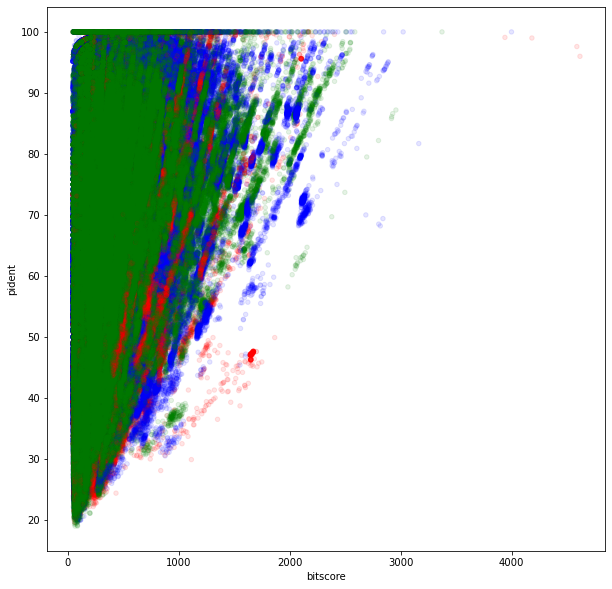

In [23]:
colors = {'bin_0002':'green', 'bin_0016':'red', 'bin_0017':'blue'}
df_bin_blast_subset.plot.scatter(x="bitscore", y="pident", c=df_bin_blast_subset["cluster"].map(colors), alpha=0.1,figsize = (10, 10))


/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/sidd/an

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bda6c4b50>,
      dtype=object)

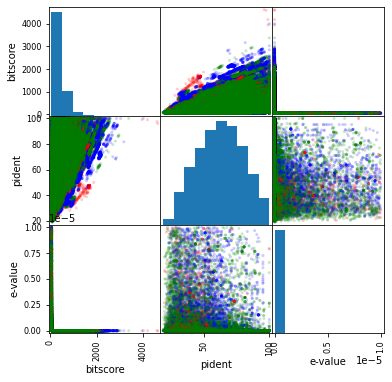

In [50]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_bin_blast_subset[["bitscore", "pident", "e-value"]], alpha = 0.2, figsize = (6, 6), c=df_bin_blast_subset["cluster"].map(colors))



/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/sidd/an

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd938617d60>,
      dtype=object)

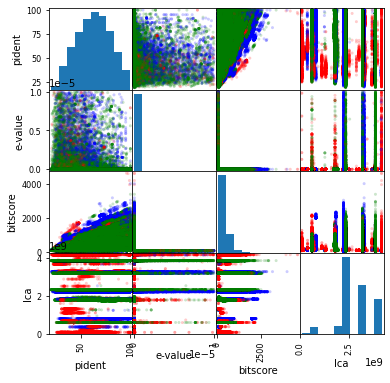

In [75]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_bin_blast_subset, alpha = 0.2, figsize = (6, 6), c=df_bin_blast_subset["cluster"].map(colors))

In [76]:
df_bin_blast_subset["color"]=pd.factorize(df_bin_blast_subset['qseqid'])[0]
df_bin_blast_subset

,qseqid,sseqid,pident,e-value,bitscore,name,rank,lca,contig,cluster,color
0,S|S1|C10170_1,GCA_000403475.2,100.0,3.580000e-13,68.6,md308,genus,2343901905,S|S1|C10170,bin_0002,0
1,S|S1|C10170_1,GCA_910575105.1,93.9,1.070000e-11,64.7,md308,genus,2343901905,S|S1|C10170,bin_0002,0
2,S|S1|C10170_1,GCA_910584615.1,90.9,5.830000e-11,62.8,md308,genus,2343901905,S|S1|C10170,bin_0002,0
3,S|S1|C10170_1,GCA_910579335.1,90.9,5.830000e-11,62.8,md308,genus,2343901905,S|S1|C10170,bin_0002,0
4,S|S1|C10170_1,GCA_010206225.2,90.9,5.830000e-11,62.8,md308,genus,2343901905,S|S1|C10170,bin_0002,0
...,...,...,...,...,...,...,...,...,...,...,...
1358299,S|S1|C9874_3,GCA_007131435.1,43.9,9.330000e-82,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113
1358300,S|S1|C9874_3,GCF_900107405.1,41.5,5.650000e-81,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113
1358301,S|S1|C9874_3,GCF_900113635.1,41.2,7.870000e-81,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113
1358302,S|S1|C9874_3,GCA_017938145.1,32.0,1.340000e-80,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113


In [77]:
df_bin_blast_subset["color"]

0             0
1             0
2             0
3             0
4             0
           ... 
1358299    8113
1358300    8113
1358301    8113
1358302    8113
1358303    8113
Name: color, Length: 1358304, dtype: int64

In [59]:
df_bin_blast_subset

,qseqid,sseqid,pident,e-value,bitscore,name,rank,lca,contig,cluster,color
0,S|S1|C10170_1,GCA_000403475.2,100.0,3.580000e-13,68.6,md308,genus,2343901905,S|S1|C10170,bin_0002,0
1,S|S1|C10170_1,GCA_910575105.1,93.9,1.070000e-11,64.7,md308,genus,2343901905,S|S1|C10170,bin_0002,0
2,S|S1|C10170_1,GCA_910584615.1,90.9,5.830000e-11,62.8,md308,genus,2343901905,S|S1|C10170,bin_0002,0
3,S|S1|C10170_1,GCA_910579335.1,90.9,5.830000e-11,62.8,md308,genus,2343901905,S|S1|C10170,bin_0002,0
4,S|S1|C10170_1,GCA_010206225.2,90.9,5.830000e-11,62.8,md308,genus,2343901905,S|S1|C10170,bin_0002,0
...,...,...,...,...,...,...,...,...,...,...,...
1358299,S|S1|C9874_3,GCA_007131435.1,43.9,9.330000e-82,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113
1358300,S|S1|C9874_3,GCF_900107405.1,41.5,5.650000e-81,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113
1358301,S|S1|C9874_3,GCF_900113635.1,41.2,7.870000e-81,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113
1358302,S|S1|C9874_3,GCA_017938145.1,32.0,1.340000e-80,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ba8cbd0a0>,
      dtype=object)

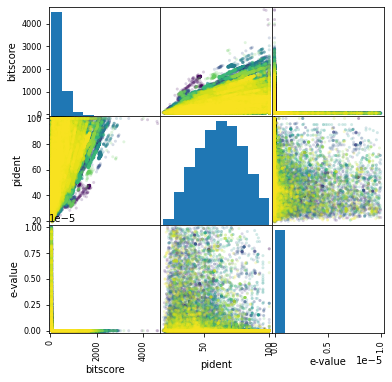

In [61]:
scatter_matrix(df_bin_blast_subset[["bitscore", "pident", "e-value"]], alpha = 0.2, figsize = (6, 6), c=df_bin_blast_subset["color"])


In [62]:
df_bin_blast_subset["color2"]=pd.factorize(df_bin_blast_subset['contig'])[0]
df_bin_blast_subset

,qseqid,sseqid,pident,e-value,bitscore,name,rank,lca,contig,cluster,color,color2
0,S|S1|C10170_1,GCA_000403475.2,100.0,3.580000e-13,68.6,md308,genus,2343901905,S|S1|C10170,bin_0002,0,0
1,S|S1|C10170_1,GCA_910575105.1,93.9,1.070000e-11,64.7,md308,genus,2343901905,S|S1|C10170,bin_0002,0,0
2,S|S1|C10170_1,GCA_910584615.1,90.9,5.830000e-11,62.8,md308,genus,2343901905,S|S1|C10170,bin_0002,0,0
3,S|S1|C10170_1,GCA_910579335.1,90.9,5.830000e-11,62.8,md308,genus,2343901905,S|S1|C10170,bin_0002,0,0
4,S|S1|C10170_1,GCA_010206225.2,90.9,5.830000e-11,62.8,md308,genus,2343901905,S|S1|C10170,bin_0002,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1358299,S|S1|C9874_3,GCA_007131435.1,43.9,9.330000e-82,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113,428
1358300,S|S1|C9874_3,GCF_900107405.1,41.5,5.650000e-81,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113,428
1358301,S|S1|C9874_3,GCF_900113635.1,41.2,7.870000e-81,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113,428
1358302,S|S1|C9874_3,GCA_017938145.1,32.0,1.340000e-80,280.0,000403475,no rank,3881140950,S|S1|C9874,bin_0002,8113,428


/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/sidd/an

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b9bf85a30>,
      dtype=object)

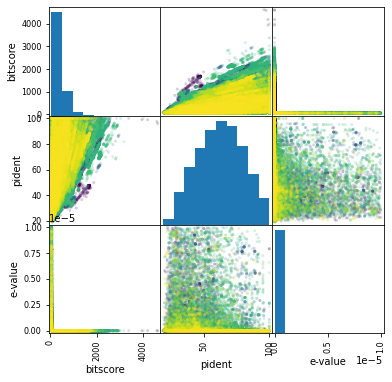

In [63]:
scatter_matrix(df_bin_blast_subset[["bitscore", "pident", "e-value"]], alpha = 0.2, figsize = (6, 6), c=df_bin_blast_subset["color2"])


## Normalizin the pivoted data table

### CLR transformation

In [14]:
from skbio.stats.composition import ilr, clr, multiplicative_replacement
X=df_bin_blast_subset_pivot.fillna(0).to_numpy()
X = multiplicative_replacement(X)
X

array([[5.33290724e-10, 5.33290724e-10, 5.33290724e-10, ...,
        5.33290724e-10, 5.33290724e-10, 5.33290724e-10],
       [5.33290724e-10, 5.33290724e-10, 5.33290724e-10, ...,
        5.33290724e-10, 5.33290724e-10, 5.33290724e-10],
       [5.33290724e-10, 5.33290724e-10, 5.33290724e-10, ...,
        5.33290724e-10, 5.33290724e-10, 5.33290724e-10],
       ...,
       [5.33290724e-10, 5.33290724e-10, 5.33290724e-10, ...,
        5.33290724e-10, 5.33290724e-10, 5.33290724e-10],
       [5.33290724e-10, 5.33290724e-10, 5.33290724e-10, ...,
        5.33290724e-10, 5.33290724e-10, 5.33290724e-10],
       [5.33290724e-10, 5.33290724e-10, 5.33290724e-10, ...,
        5.33290724e-10, 5.33290724e-10, 5.33290724e-10]])

In [15]:
X_norm=clr(X)
X_norm

array([[-0.00313685, -0.00313685, -0.00313685, ..., -0.00313685,
        -0.00313685, -0.00313685],
       [-0.07378914, -0.07378914, -0.07378914, ..., -0.07378914,
        -0.07378914, -0.07378914],
       [-0.07378531, -0.07378531, -0.07378531, ..., -0.07378531,
        -0.07378531, -0.07378531],
       ...,
       [-0.06992022, -0.06992022, -0.06992022, ..., -0.06992022,
        -0.06992022, -0.06992022],
       [-0.0174392 , -0.0174392 , -0.0174392 , ..., -0.0174392 ,
        -0.0174392 , -0.0174392 ],
       [-0.05900974, -0.05900974, -0.05900974, ..., -0.05900974,
        -0.05900974, -0.05900974]])

In [16]:
norm_df = pd.DataFrame(X_norm, index=df_bin_blast_subset_pivot.index)
norm_df


,0,1,2,3,4,5,6,7,8,9,...,43293,43294,43295,43296,43297,43298,43299,43300,43301,43302
qseqid,,,,,,,,,,,,,,,,,,,,,
S|S1|C10170_1,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,...,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137,-0.003137
S|S1|C10170_2,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,...,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789,-0.073789
S|S1|C10170_3,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,...,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785,-0.073785
S|S1|C10170_4,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,...,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407,-0.073407
S|S1|C10188_1,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,...,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782,-0.073782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S|S1|C9859_4,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,...,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117,-0.074117
S|S1|C9859_5,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,...,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400,-0.001400
S|S1|C9874_1,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,...,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920,-0.069920


In [17]:
from tsne import bh_sne
from sklearn.decomposition import PCA

In [18]:
X=norm_df.dropna(axis="index", how="all").fillna(0).to_numpy()
random_state = np.random.RandomState(42)
X = PCA(n_components=50, random_state=random_state).fit_transform(X)

In [19]:
X.shape
n_samples, n_components = X.shape

In [20]:
perplexity = 30.0
n_rows = n_samples - 1
scaler = 3.0
if n_rows < (scaler * perplexity):
    perplexity = (n_rows / scaler) - 1

In [21]:
embed=bh_sne(data=X,
            d=2,
            perplexity=perplexity,
            random_state=random_state,
        )
embed

array([[11.73440315,  2.8037475 ],
       [41.77288511, -6.39315474],
       [43.10970903, -6.63667852],
       ...,
       [13.45691049, -3.51946624],
       [12.92032207, -2.95238769],
       [13.58721383, -3.74673279]])

In [22]:
embed.shape

(8114, 2)

In [23]:
embedded_df = pd.DataFrame(embed, index=df_bin_blast_subset_pivot.index, columns=["x_1", "x_2"])
embedded_df 

,x_1,x_2
qseqid,,
S|S1|C10170_1,11.734403,2.803747
S|S1|C10170_2,41.772885,-6.393155
S|S1|C10170_3,43.109709,-6.636679
S|S1|C10170_4,49.251652,-6.263428
S|S1|C10188_1,17.563420,-0.637952
...,...,...
S|S1|C9859_4,33.446643,8.028644
S|S1|C9859_5,7.138578,-1.513258
S|S1|C9874_1,13.456910,-3.519466


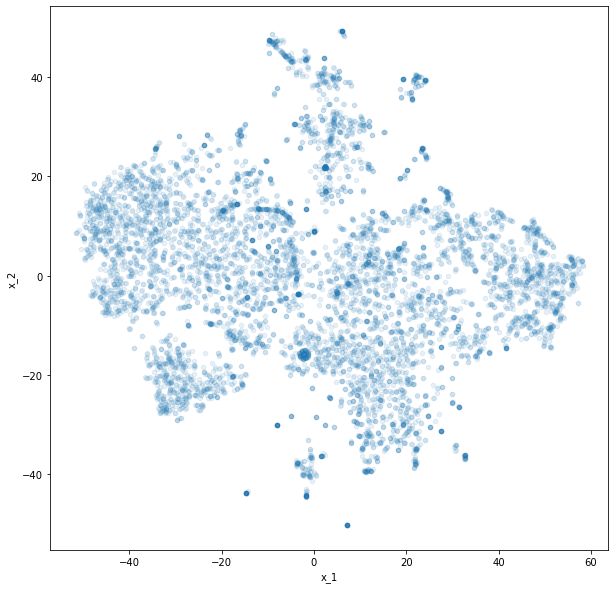

In [24]:
embedded_df.plot.scatter(x="x_1", y="x_2", alpha=0.1,figsize = (10, 10))


In [25]:
embedded_df = pd.DataFrame(embed, index=df_bin_blast_subset_pivot.index, columns=["x_1", "x_2"])
embedded_df.reset_index(inplace=True)
embedded_df["contig"]=embedded_df["qseqid"].apply(lambda x: x.rsplit('_',1)[0])
embedded_df

,qseqid,x_1,x_2,contig
0,S|S1|C10170_1,11.734403,2.803747,S|S1|C10170
1,S|S1|C10170_2,41.772885,-6.393155,S|S1|C10170
2,S|S1|C10170_3,43.109709,-6.636679,S|S1|C10170
3,S|S1|C10170_4,49.251652,-6.263428,S|S1|C10170
4,S|S1|C10188_1,17.563420,-0.637952,S|S1|C10188
...,...,...,...,...
8109,S|S1|C9859_4,33.446643,8.028644,S|S1|C9859
8110,S|S1|C9859_5,7.138578,-1.513258,S|S1|C9859
8111,S|S1|C9874_1,13.456910,-3.519466,S|S1|C9874
8112,S|S1|C9874_2,12.920322,-2.952388,S|S1|C9874


In [26]:
df_bin_embed=embedded_df.merge(df_bin_subset, how="inner", on="contig")
df_bin_embed

,qseqid,x_1,x_2,contig,cluster
0,S|S1|C10170_1,11.734403,2.803747,S|S1|C10170,bin_0002
1,S|S1|C10170_2,41.772885,-6.393155,S|S1|C10170,bin_0002
2,S|S1|C10170_3,43.109709,-6.636679,S|S1|C10170,bin_0002
3,S|S1|C10170_4,49.251652,-6.263428,S|S1|C10170,bin_0002
4,S|S1|C10188_1,17.563420,-0.637952,S|S1|C10188,bin_0002
...,...,...,...,...,...
8109,S|S1|C9859_4,33.446643,8.028644,S|S1|C9859,bin_0002
8110,S|S1|C9859_5,7.138578,-1.513258,S|S1|C9859,bin_0002
8111,S|S1|C9874_1,13.456910,-3.519466,S|S1|C9874,bin_0002
8112,S|S1|C9874_2,12.920322,-2.952388,S|S1|C9874,bin_0002


In [27]:
df_bin_embed["color"]=pd.factorize(df_bin_embed['contig'])[0]
df_bin_embed

,qseqid,x_1,x_2,contig,cluster,color
0,S|S1|C10170_1,11.734403,2.803747,S|S1|C10170,bin_0002,0
1,S|S1|C10170_2,41.772885,-6.393155,S|S1|C10170,bin_0002,0
2,S|S1|C10170_3,43.109709,-6.636679,S|S1|C10170,bin_0002,0
3,S|S1|C10170_4,49.251652,-6.263428,S|S1|C10170,bin_0002,0
4,S|S1|C10188_1,17.563420,-0.637952,S|S1|C10188,bin_0002,1
...,...,...,...,...,...,...
8109,S|S1|C9859_4,33.446643,8.028644,S|S1|C9859,bin_0002,427
8110,S|S1|C9859_5,7.138578,-1.513258,S|S1|C9859,bin_0002,427
8111,S|S1|C9874_1,13.456910,-3.519466,S|S1|C9874,bin_0002,428
8112,S|S1|C9874_2,12.920322,-2.952388,S|S1|C9874,bin_0002,428


In [28]:
df_bin_embed["color"]

0         0
1         0
2         0
3         0
4         1
       ... 
8109    427
8110    427
8111    428
8112    428
8113    428
Name: color, Length: 8114, dtype: int64

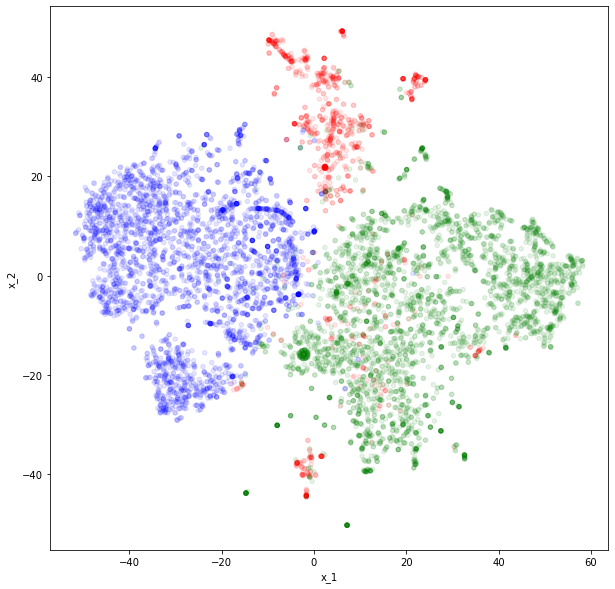

In [29]:
colors = {'bin_0002':'green', 'bin_0016':'red', 'bin_0017':'blue'}
df_bin_embed.plot.scatter(x="x_1", y="x_2", c=df_bin_embed["cluster"].map(colors), alpha=0.1,figsize = (10, 10))


/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/sidd/anaconda3/envs/soil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/sidd/an

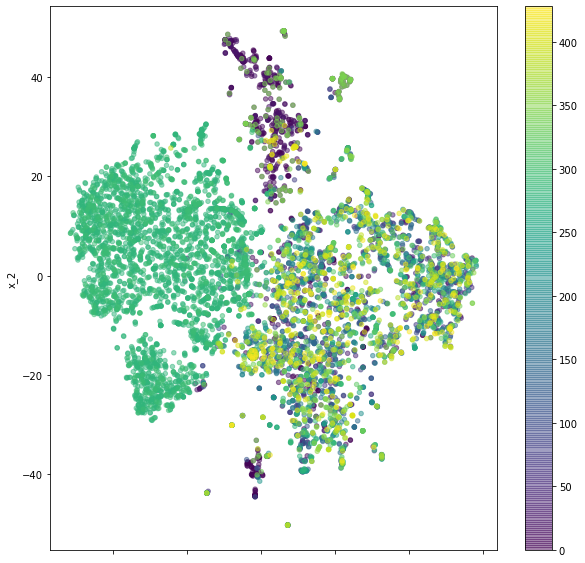

In [46]:
# scatter_matrix(df_bin_embed[["x_1", "x_2"]], alpha = 0.1, figsize = (10, 10), c=df_bin_embed["color"])
df_bin_embed.plot.scatter(x="x_1", y="x_2", c=df_bin_embed["color"],colormap='viridis', alpha=0.5,figsize = (10, 10))
# sns.scatterplot(data=df_bin_embed, x='x_1', y='x_2', hue='contig')

In [30]:
import hdbscan

In [31]:
df_bin_embed

,qseqid,x_1,x_2,contig,cluster,color
0,S|S1|C10170_1,11.734403,2.803747,S|S1|C10170,bin_0002,0
1,S|S1|C10170_2,41.772885,-6.393155,S|S1|C10170,bin_0002,0
2,S|S1|C10170_3,43.109709,-6.636679,S|S1|C10170,bin_0002,0
3,S|S1|C10170_4,49.251652,-6.263428,S|S1|C10170,bin_0002,0
4,S|S1|C10188_1,17.563420,-0.637952,S|S1|C10188,bin_0002,1
...,...,...,...,...,...,...
8109,S|S1|C9859_4,33.446643,8.028644,S|S1|C9859,bin_0002,427
8110,S|S1|C9859_5,7.138578,-1.513258,S|S1|C9859,bin_0002,427
8111,S|S1|C9874_1,13.456910,-3.519466,S|S1|C9874,bin_0002,428
8112,S|S1|C9874_2,12.920322,-2.952388,S|S1|C9874,bin_0002,428


In [32]:
features_cols = [col for col in df_bin_embed.columns if "x_" in col or col == "coverage"]
features_cols
# Subset what will go into clusterer to only features (kmer and coverage information)
features_df = df_bin_embed[features_cols]
features_df

,x_1,x_2
0,11.734403,2.803747
1,41.772885,-6.393155
2,43.109709,-6.636679
3,49.251652,-6.263428
4,17.563420,-0.637952
...,...,...
8109,33.446643,8.028644
8110,7.138578,-1.513258
8111,13.456910,-3.519466
8112,12.920322,-2.952388


In [33]:
features_df.to_numpy()
# features_df.isnull()

array([[11.73440315,  2.8037475 ],
       [41.77288511, -6.39315474],
       [43.10970903, -6.63667852],
       ...,
       [13.45691049, -3.51946624],
       [12.92032207, -2.95238769],
       [13.58721383, -3.74673279]])

In [34]:
import hdbscan
clusters=hdbscan.HDBSCAN(min_cluster_size=10, min_samples = 5,cluster_selection_method="leaf").fit_predict(features_df.to_numpy())
np.unique(clusters)


array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [35]:
clusters_df=pd.Series(clusters, index=df_bin_embed["qseqid"], name="cluster")
clusters_df

qseqid
S|S1|C10170_1    164
S|S1|C10170_2     -1
S|S1|C10170_3     -1
S|S1|C10170_4     -1
S|S1|C10188_1     -1
                ... 
S|S1|C9859_4      -1
S|S1|C9859_5     170
S|S1|C9874_1     131
S|S1|C9874_2     131
S|S1|C9874_3     131
Name: cluster, Length: 8114, dtype: int64

In [36]:
# NOTE: HDBSCAN labels outliers with -1
# outlier_label = -1
# clusters = clusters.loc[clusters.ne(outlier_label)]
# clusters

In [37]:
clusters_merged=df_bin_embed.merge(clusters_df, how="inner", on="qseqid")
clusters_merged

,qseqid,x_1,x_2,contig,cluster_x,color,cluster_y
0,S|S1|C10170_1,11.734403,2.803747,S|S1|C10170,bin_0002,0,164
1,S|S1|C10170_2,41.772885,-6.393155,S|S1|C10170,bin_0002,0,-1
2,S|S1|C10170_3,43.109709,-6.636679,S|S1|C10170,bin_0002,0,-1
3,S|S1|C10170_4,49.251652,-6.263428,S|S1|C10170,bin_0002,0,-1
4,S|S1|C10188_1,17.563420,-0.637952,S|S1|C10188,bin_0002,1,-1
...,...,...,...,...,...,...,...
8109,S|S1|C9859_4,33.446643,8.028644,S|S1|C9859,bin_0002,427,-1
8110,S|S1|C9859_5,7.138578,-1.513258,S|S1|C9859,bin_0002,427,170
8111,S|S1|C9874_1,13.456910,-3.519466,S|S1|C9874,bin_0002,428,131
8112,S|S1|C9874_2,12.920322,-2.952388,S|S1|C9874,bin_0002,428,131


In [38]:
np.unique(clusters)


array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [39]:
import hdbscan
clusterer=hdbscan.HDBSCAN(min_cluster_size=250, min_samples = 60,cluster_selection_method="leaf")
clusterer.fit(features_df.to_numpy())


HDBSCAN(cluster_selection_method='leaf', min_cluster_size=250, min_samples=60)

In [40]:
clusterer.labels_.max()

7

In [41]:
palette = sns.color_palette()
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [42]:
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]


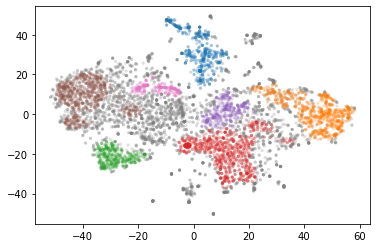

In [43]:
plot_kwds = {'alpha' : 0.25, 's' : 10, 'linewidths':0}
plt.scatter(features_df.to_numpy().T[0], features_df.to_numpy().T[1], c=cluster_colors, **plot_kwds)

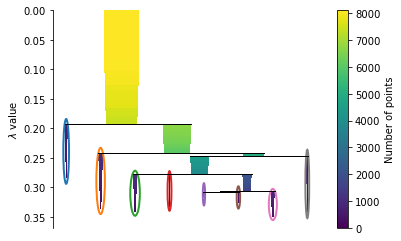

In [44]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [146]:
clusterer.labels_

array([15, -1, -1, ..., -1, -1, -1])

{'class':                qseqid                 name   rank         lca
 232      S|S1|C458_22           clostridia  class  1797966051
 234      S|S1|C458_24           clostridia  class  1797966051
 251       S|S1|C472_9  alphaproteobacteria  class  3294429563
 252      S|S1|C472_10  alphaproteobacteria  class  3294429563
 253      S|S1|C472_11  alphaproteobacteria  class  3294429563
 ...               ...                  ...    ...         ...
 63873   S|S1|C55945_1           clostridia  class  1797966051
 63876   S|S1|C55945_4           clostridia  class  1797966051
 63877   S|S1|C55945_5           clostridia  class  1797966051
 63960   S|S1|C55995_3           clostridia  class  1797966051
 64124  S|S1|C56111_14           clostridia  class  1797966051
 
 [1505 rows x 4 columns],
 'family':                 qseqid              name    rank         lca
 5           S|S1|C15_6   lachnospiraceae  family  3217231047
 8           S|S1|C36_3  burkholderiaceae  family  3902333803
 9         

### Subsetting database on taxonomy

In [53]:
dict(list(df_bin_blast_subset.groupby("rank")))

{'class':                   qseqid           sseqid  pident        e-value  bitscore  \
 9846       S|S1|C10619_1  GCF_004341945.1   100.0   3.940000e-16      79.3   
 9847       S|S1|C10619_1  GCF_015546995.1   100.0   3.940000e-16      79.3   
 9848       S|S1|C10619_1  GCA_003481775.1    64.3   3.160000e-08      57.0   
 16467    S|S1|C10619_139  GCA_015056865.1    87.2   3.980000e-19      85.1   
 16468    S|S1|C10619_139  GCA_017521985.1    83.0   3.220000e-18      82.8   
 ...                  ...              ...     ...            ...       ...   
 1355998     S|S1|C9562_2  GCA_910579285.1    88.2  1.320000e-191     535.0   
 1355999     S|S1|C9562_2  GCA_004555915.1    88.5  1.650000e-191     535.0   
 1356000     S|S1|C9562_2  GCA_018228645.1    87.5  1.470000e-191     535.0   
 1356001     S|S1|C9562_2  GCA_019112985.1    88.9  1.530000e-191     535.0   
 1356002     S|S1|C9562_2  GCA_018064805.1    88.2  1.870000e-191     535.0   
 
               taxid        name   rank  

In [54]:
df_norank=dict(list(df_bin_blast_subset.groupby("rank")))["no rank"]
df_norank

,qseqid,sseqid,pident,e-value,bitscore,taxid,name,rank,lca,contig,cluster
1400,S|S1|C10315_1,GCA_000403475.2,100.0,1.020000e-37,129.0,3881140950,000403475,no rank,3881140950,S|S1|C10315,bin_0002
3965,S|S1|C10442_1,GCA_000403475.2,100.0,7.860000e-34,134.0,3881140950,000403475,no rank,3881140950,S|S1|C10442,bin_0002
3966,S|S1|C10442_1,GCA_910586965.1,81.4,1.350000e-23,105.0,576505400,000403475,no rank,3881140950,S|S1|C10442,bin_0002
3967,S|S1|C10442_1,GCA_910579335.1,66.7,3.420000e-16,84.3,1880972289,000403475,no rank,3881140950,S|S1|C10442,bin_0002
3968,S|S1|C10442_1,GCA_910584615.1,59.6,3.020000e-15,81.6,4056280857,000403475,no rank,3881140950,S|S1|C10442,bin_0002
...,...,...,...,...,...,...,...,...,...,...,...
1358299,S|S1|C9874_3,GCF_900107405.1,41.5,5.650000e-81,280.0,573577659,000403475,no rank,3881140950,S|S1|C9874,bin_0002
1358300,S|S1|C9874_3,GCA_007131435.1,43.9,9.330000e-82,280.0,2835238206,000403475,no rank,3881140950,S|S1|C9874,bin_0002
1358301,S|S1|C9874_3,GCF_900113635.1,41.2,7.870000e-81,280.0,3838567809,000403475,no rank,3881140950,S|S1|C9874,bin_0002
1358302,S|S1|C9874_3,GCA_017938145.1,32.0,1.340000e-80,280.0,1683100024,000403475,no rank,3881140950,S|S1|C9874,bin_0002


In [55]:
df_norank_pivot=df_norank.pivot(index="qseqid", columns="taxid", values="pident").fillna(0)
df_norank_pivot

taxid,151528,212702,294456,426446,519093,667343,672714,1049043,1509540,1570146,...,4293989178,4294108371,4294223855,4294327144,4294354962,4294382456,4294556408,4294667763,4294687506,4294718222
qseqid,,,,,,,,,,,,,,,,,,,,,
S|S1|C10315_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C10442_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C10442_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C10442_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C10442_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S|S1|C9291_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C9562_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S|S1|C9874_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X=df_norank_pivot.fillna(0).to_numpy()
X = multiplicative_replacement(X)
X_norm=clr(X)
norm_df = pd.DataFrame(X_norm, index=df_norank_pivot.index)

In [65]:
X=norm_df.dropna(axis="index", how="all").fillna(0).to_numpy()
random_state = np.random.RandomState(42)
X = PCA(n_components=50, random_state=random_state).fit_transform(X)

In [66]:

n_samples, n_components = X.shape
X.shape

(2809, 50)

In [67]:

perplexity = 30.0
n_rows = n_samples - 1
scaler = 3.0
if n_rows < (scaler * perplexity):
    perplexity = (n_rows / scaler) - 1
embed=bh_sne(data=X,
            d=2,
            perplexity=perplexity,
            random_state=random_state,
        )
embed

array([[ -1.14301912, -13.03099343],
       [ 15.72342815, -17.76624997],
       [ 37.35128653,   8.66645555],
       ...,
       [  3.59763022, -22.14441714],
       [  3.73941697, -20.59674673],
       [  3.58498639, -22.28270426]])

In [69]:
embedded_df = pd.DataFrame(embed, index=df_norank_pivot.index, columns=["x_1", "x_2"])
embedded_df 

,x_1,x_2
qseqid,,
S|S1|C10315_1,-1.143019,-13.030993
S|S1|C10442_1,15.723428,-17.766250
S|S1|C10442_10,37.351287,8.666456
S|S1|C10442_12,34.044155,8.135016
S|S1|C10442_15,7.569870,-5.840175
...,...,...
S|S1|C9291_6,31.553562,-10.333899
S|S1|C9562_4,29.167157,15.118674
S|S1|C9874_1,3.597630,-22.144417


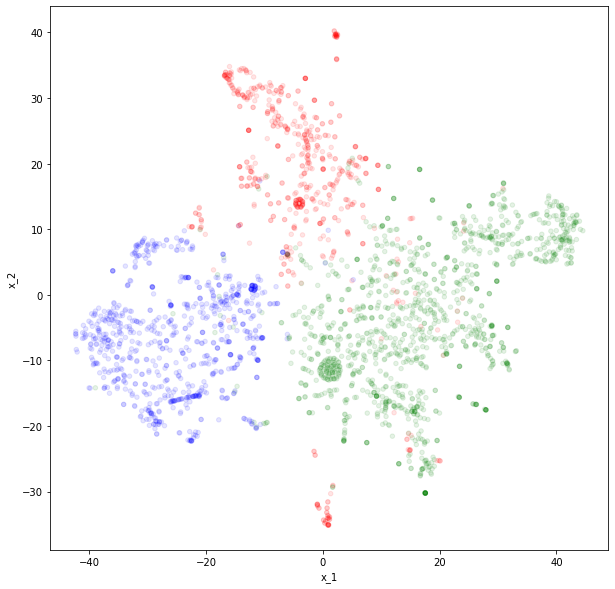

In [70]:
embedded_df.reset_index(inplace=True)
embedded_df["contig"]=embedded_df["qseqid"].apply(lambda x: x.rsplit('_',1)[0])

df_bin_embed=embedded_df.merge(df_bin_subset, how="inner", on="contig")

colors = {'bin_0002':'green', 'bin_0016':'red', 'bin_0017':'blue'}
df_bin_embed.plot.scatter(x="x_1", y="x_2", c=df_bin_embed["cluster"].map(colors), alpha=0.1,figsize = (10, 10))


In [97]:
import hdbscan
features_cols = [col for col in df_bin_embed.columns if "x_" in col or col == "coverage"]
# Subset what will go into clusterer to only features (kmer and coverage information)
features_df = df_bin_embed[features_cols]
clusterer=hdbscan.HDBSCAN(min_cluster_size=250, min_samples = 60,cluster_selection_method="leaf")
clusterer.fit(features_df.to_numpy())

HDBSCAN(cluster_selection_method='leaf', min_cluster_size=250, min_samples=60)

In [98]:
clusterer.labels_.max()

2

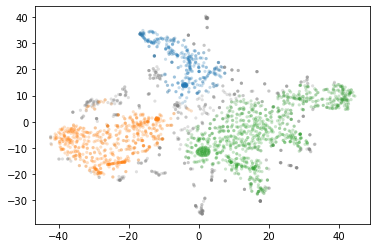

In [99]:
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plot_kwds = {'alpha' : 0.25, 's' : 10, 'linewidths':0}
plt.scatter(features_df.to_numpy().T[0], features_df.to_numpy().T[1], c=cluster_colors, **plot_kwds)